ObsとMSMの差を確認するノート
## したい事
- 雲量の違い
- その可視化

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['savefig.facecolor'] = 'white'
sns.set(font="Yu Gothic")

%matplotlib inline
import japanize_matplotlib
import datetime as dt
import time
import sys
sys.path.append("../")
import os

import modules
import modules.self_made_modules as mymodule

In [2]:
def plott(date):
    pocj = mymodule.PlotCloudOnJapan(date)
    msm_df = pocj.coordinate(lat=35.41,lon=139.45)
    obs_df = pd.read_csv(f"../obsData_utc/44_47662/{date.year}/{date.month}/44_47662_{date.year}_{date.month}_{date.day}.csv")
    obs_df["日付"] = pd.to_datetime(obs_df["日付"])

    fig,ax = plt.subplots()

    ax.plot(msm_df.index,msm_df["ncld"],label="MSM")
    ax.set_xlabel("Date")
    ax.tick_params(axis="x",rotation=45)
    ax.set_ylabel("MSMの雲量")
    ax.set_ylim(0,100)

    ax1 = ax.twinx()
    ax1.plot(obs_df["日付"],obs_df["雲量"],label="OBS",color="red")
    ax1.set_ylabel("Obsの雲量")
    ax1.set_ylim(0,10)

    lines = ax.get_lines() + ax1.get_lines()
    labels = [line.get_label() for line in lines]
    ax1.legend(lines,labels,loc="best")
    plt.title(f"東京(35,139)|{date.year}-{date.month}-{date.day}")
    # plt.subplots_adjust(top=1.2)
    os.makedirs(f"../png/diff/{date.month}",exist_ok=True)
    plt.savefig(f"../png/diff/{date.month}/東京_{date.year}_{date.month}_{date.day}.png",bbox_inches='tight')
    plt.close()

    # plt.show()

In [100]:
date = dt.date(2022,6,1)

2022-06-01


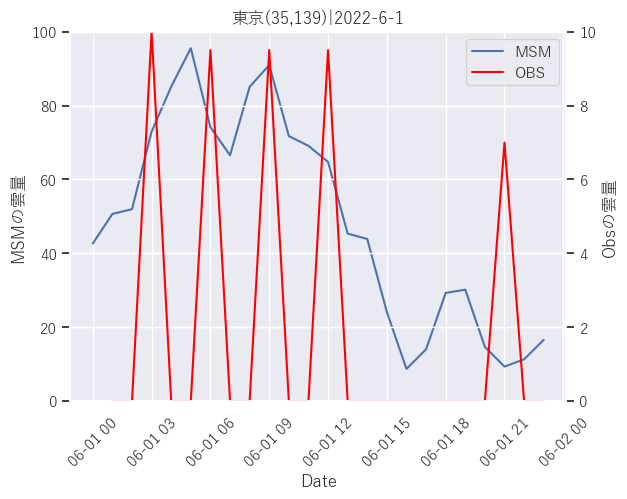

In [101]:
print(date)
plott(date)
date += dt.timedelta(days=1)

In [3]:
date = dt.date(2022,1,1)
while True:
    print("\r"+str(date),end="")
    plott(date)
    date += dt.timedelta(days=1)
    time.sleep(2)
    if date.year > 2022:
        break
    # if date.month > 1:
    #     break

2022-12-31

FileNotFoundError: [Errno 2] No such file or directory: '../obsData_utc/44_47662/2022/12/44_47662_2022_12_31.csv'